# Final Project: Measuring galaxy redshift

In [821]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy

from astropy.io import fits as pyfits

import pietras_functions as pifunc

SDSS_DATA = 'spec-0429-51820-0056.fits.gz'

# From: https://classic.sdss.org/dr6/algorithms/linestable.php -->
# Emission lines (Ang)
S_II = [6732.67, 6718.29]
H_ALPHA = 6564.61
N_II = [6585.27, 6549.86]
O_III = [5008.240, 4960.295]
H_BETA = 4862.68

# Absorption lines

CA_II = [8664.52, 8544.44, 8500.36]
NA = 5895.6
MG = 5176.7 
G = 4305.61
H = 3969.588
K = 3934.777

### 1. Measure the redshift (Δλ / λ) of the galaxy

In [822]:
# Load in SDSS data
# header = pyfits.getheader(SDSS_DATA) # Find some more details such as units / object id in header

hdulist=pyfits.open(SDSS_DATA)
data = hdulist[1].data
wavelength = 10 ** data['loglam'] # convert from log10 to linear
flux = data['flux']

Text(0.5, 1.0, 'Flux vs Wavelength of SDSS Galaxy: 0429-51817-01')

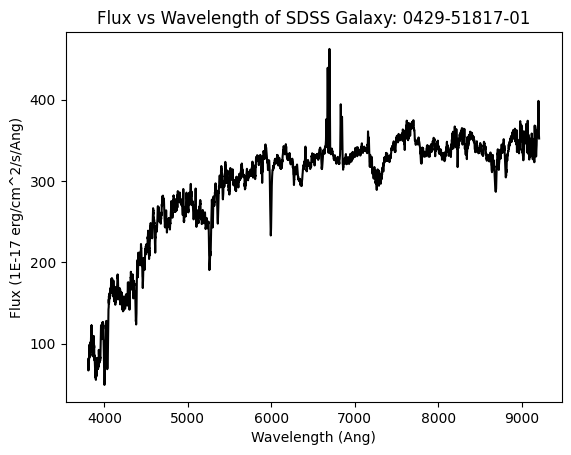

In [823]:
plt.plot(wavelength, flux, color = 'black')
plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("Flux vs Wavelength of SDSS Galaxy: 0429-51817-01")

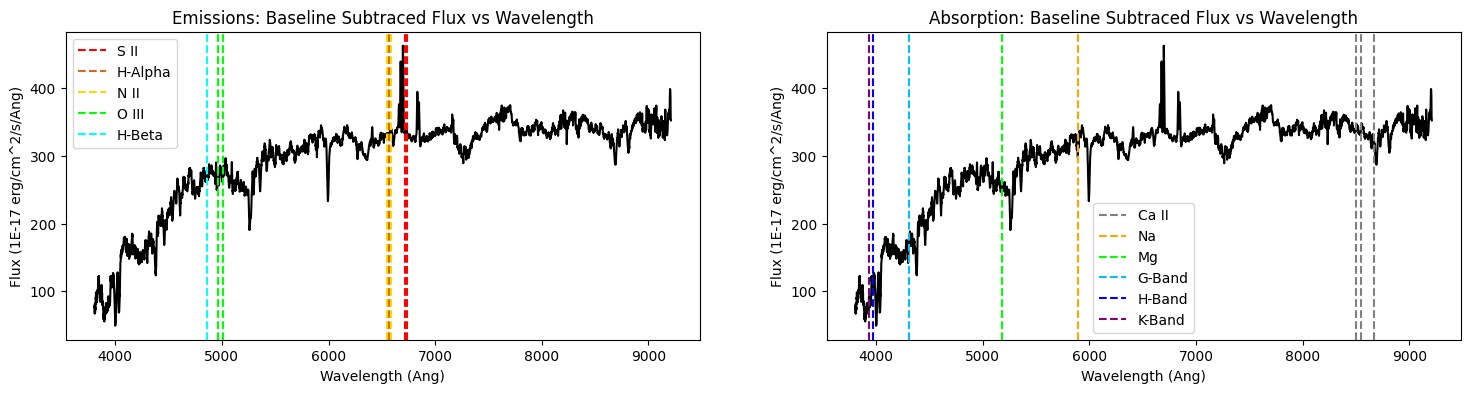

In [824]:
fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Emission
axs[0].plot(wavelength, flux, color = 'black')

axs[0].axvline(S_II[0], linestyle= '--', label = 'S II', color = 'red')
axs[0].axvline(S_II[1], linestyle= '--', color = 'red')

axs[0].axvline(H_ALPHA, linestyle= '--', label = 'H-Alpha', color = 'chocolate')

axs[0].axvline(N_II[0], linestyle= '--', label = 'N II', color = 'gold')
axs[0].axvline(N_II[1], linestyle= '--', color = 'gold')

axs[0].axvline(O_III[0], linestyle= '--', label = 'O III', color = 'lime')
axs[0].axvline(O_III[1], linestyle= '--', color = 'lime')

axs[0].axvline(H_BETA, linestyle= '--', label = 'H-Beta', color = 'cyan')

axs[0].set_xlabel("Wavelength (Ang)")
axs[0].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[0].set_title("Emissions: Baseline Subtraced Flux vs Wavelength")
axs[0].legend()

# Absorption

axs[1].plot(wavelength, flux, color = 'black')

axs[1].axvline(CA_II[0], linestyle= '--', label = 'Ca II', color = 'gray')
axs[1].axvline(CA_II[1], linestyle= '--', color = 'gray')
axs[1].axvline(CA_II[2], linestyle= '--', color = 'gray')

axs[1].axvline(NA, linestyle= '--', label = 'Na', color = 'orange')

axs[1].axvline(MG, linestyle= '--', label = 'Mg', color = 'lime')

axs[1].axvline(G, linestyle= '--', label = 'G-Band', color = 'deepskyblue')

axs[1].axvline(H, linestyle= '--', label = 'H-Band', color = 'blue')

axs[1].axvline(K, linestyle= '--', label = 'K-Band', color = 'purple')

axs[1].set_xlabel("Wavelength (Ang)")
axs[1].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[1].set_title("Absorption: Baseline Subtraced Flux vs Wavelength")
axs[1].legend()


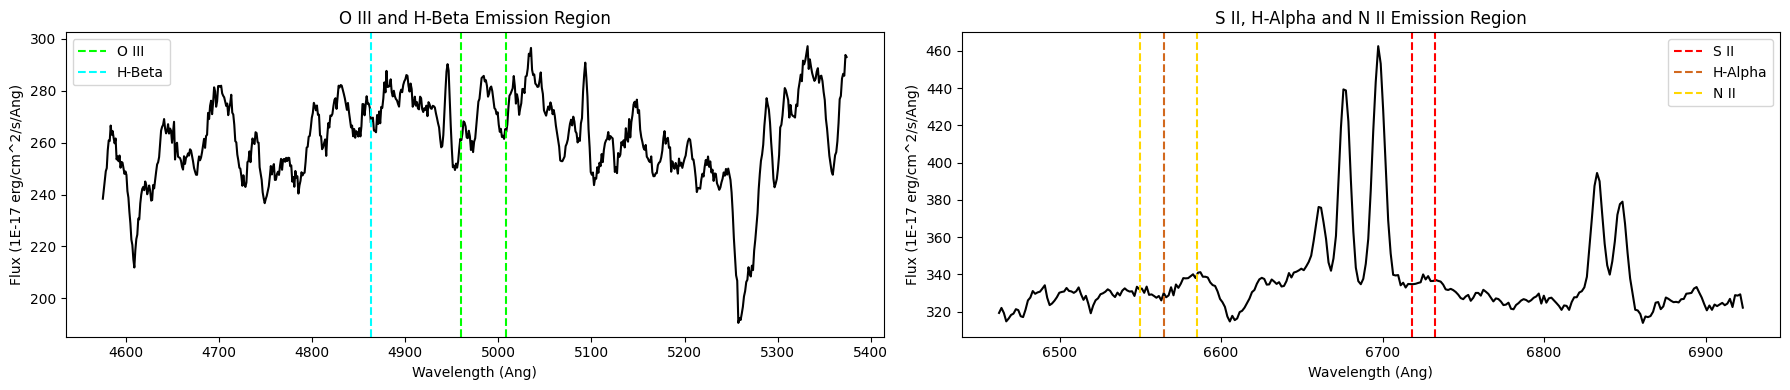

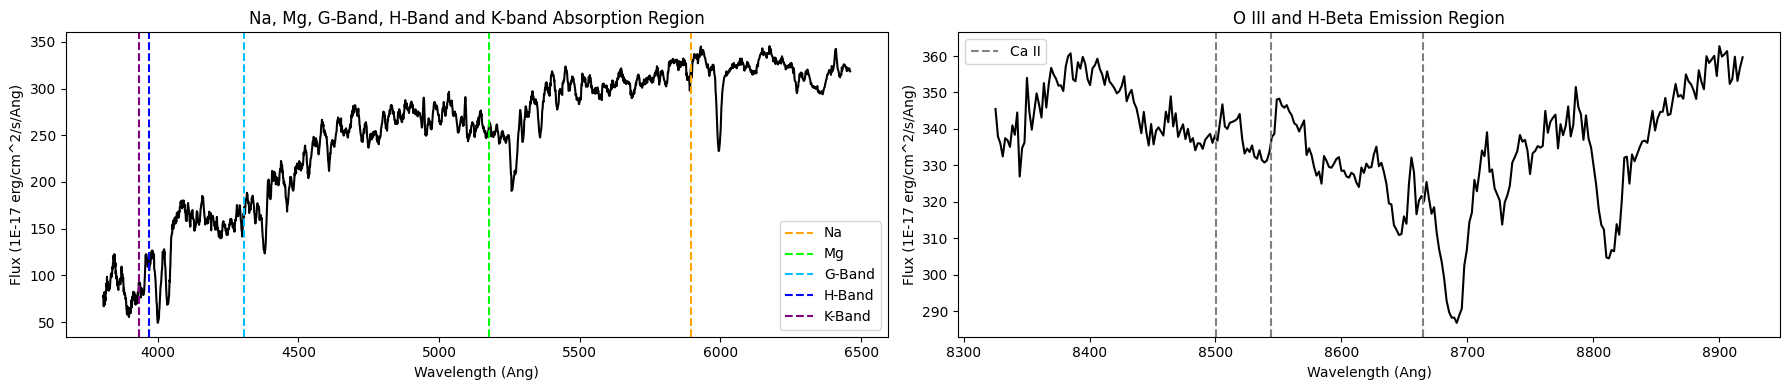

In [825]:
# Identify areas of interest to make extrema computation easier
# We should only select emission / absorption that are actually prominent  

# Emission

fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Area 1

axs[0].plot(wavelength[800:1500], flux[800:1500], color = 'black')

axs[0].axvline(O_III[0], linestyle= '--', label = 'O III', color = 'lime')
axs[0].axvline(O_III[1], linestyle= '--', color = 'lime')

axs[0].axvline(H_BETA, linestyle= '--', label = 'H-Beta', color = 'cyan')

axs[0].set_xlabel("Wavelength (Ang)")
axs[0].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[0].set_title("O III and H-Beta Emission Region")
axs[0].legend()

# Area 2

axs[1].plot(wavelength[2300:2600], flux[2300:2600], color = 'black')

axs[1].axvline(S_II[0], linestyle= '--', label = 'S II', color = 'red')
axs[1].axvline(S_II[1], linestyle= '--', color = 'red')

axs[1].axvline(H_ALPHA, linestyle= '--', label = 'H-Alpha', color = 'chocolate')

axs[1].axvline(N_II[0], linestyle= '--', label = 'N II', color = 'gold')
axs[1].axvline(N_II[1], linestyle= '--', color = 'gold')

axs[1].set_xlabel("Wavelength (Ang)")
axs[1].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[1].set_title("S II, H-Alpha and N II Emission Region")
axs[1].legend()

plt.tight_layout()
plt.show()

# Absorption

fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Area 1

axs[0].plot(wavelength[:2300], flux[:2300], color = 'black')

axs[0].axvline(NA, linestyle= '--', label = 'Na', color = 'orange')

axs[0].axvline(MG, linestyle= '--', label = 'Mg', color = 'lime')

axs[0].axvline(G, linestyle= '--', label = 'G-Band', color = 'deepskyblue')

axs[0].axvline(H, linestyle= '--', label = 'H-Band', color = 'blue')

axs[0].axvline(K, linestyle= '--', label = 'K-Band', color = 'purple')

axs[0].set_xlabel("Wavelength (Ang)")
axs[0].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[0].set_title("Na, Mg, G-Band, H-Band and K-band Absorption Region")
axs[0].legend()

# Area 2

axs[1].plot(wavelength[3400:3700], flux[3400:3700], color = 'black')

axs[1].axvline(CA_II[0], linestyle= '--', label = 'Ca II', color = 'gray')
axs[1].axvline(CA_II[1], linestyle= '--', color = 'gray')
axs[1].axvline(CA_II[2], linestyle= '--', color = 'gray')

axs[1].set_xlabel("Wavelength (Ang)")
axs[1].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[1].set_title("O III and H-Beta Emission Region")
axs[1].legend()

plt.tight_layout()
plt.show()

In [826]:
smoothed_flux = scipy.ndimage.gaussian_filter1d(flux, sigma=2) # Smooth out the data to get a better max value

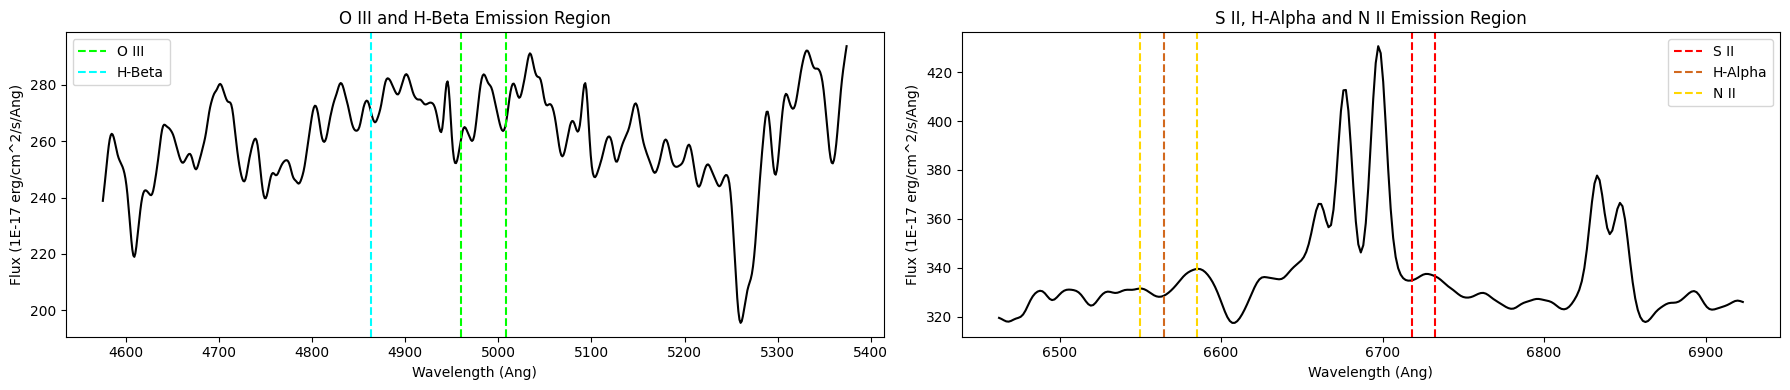

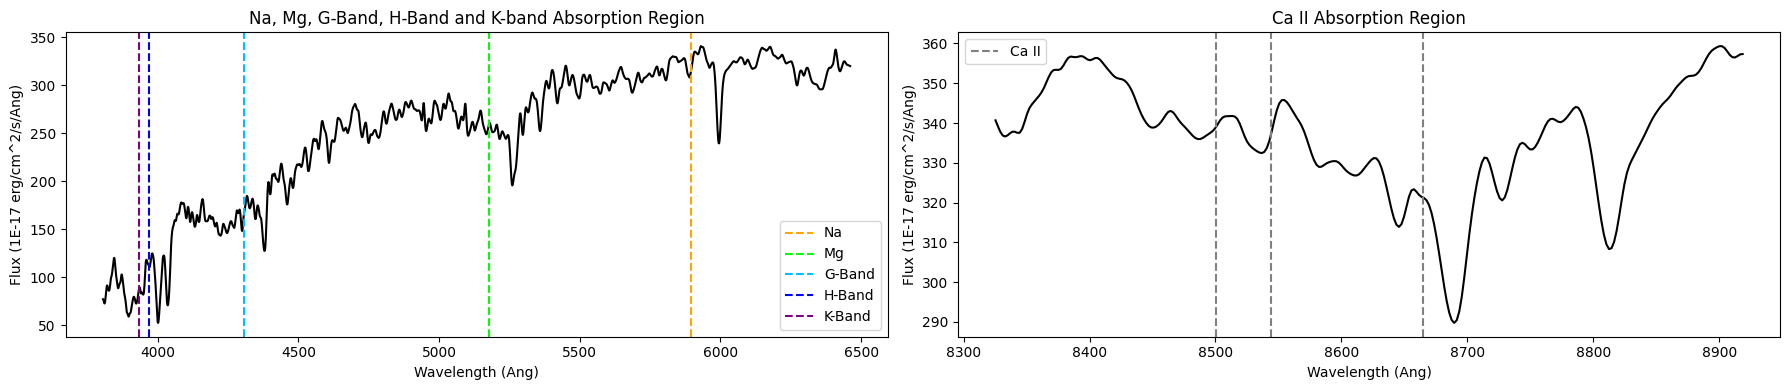

In [827]:
# Verify spectral lines are still identifiable

# Emission

fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Area 1

axs[0].plot(wavelength[800:1500], smoothed_flux[800:1500], color = 'black')

axs[0].axvline(O_III[0], linestyle= '--', label = 'O III', color = 'lime')
axs[0].axvline(O_III[1], linestyle= '--', color = 'lime')

axs[0].axvline(H_BETA, linestyle= '--', label = 'H-Beta', color = 'cyan')

axs[0].set_xlabel("Wavelength (Ang)")
axs[0].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[0].set_title("O III and H-Beta Emission Region")
axs[0].legend()

# Area 2

axs[1].plot(wavelength[2300:2600], smoothed_flux[2300:2600], color = 'black')

axs[1].axvline(S_II[0], linestyle= '--', label = 'S II', color = 'red')
axs[1].axvline(S_II[1], linestyle= '--', color = 'red')

axs[1].axvline(H_ALPHA, linestyle= '--', label = 'H-Alpha', color = 'chocolate')

axs[1].axvline(N_II[0], linestyle= '--', label = 'N II', color = 'gold')
axs[1].axvline(N_II[1], linestyle= '--', color = 'gold')

axs[1].set_xlabel("Wavelength (Ang)")
axs[1].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[1].set_title("S II, H-Alpha and N II Emission Region")
axs[1].legend()

plt.tight_layout()
plt.show()

# Absorption

fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Area 1

axs[0].plot(wavelength[:2300], smoothed_flux[:2300], color = 'black')

axs[0].axvline(NA, linestyle= '--', label = 'Na', color = 'orange')

axs[0].axvline(MG, linestyle= '--', label = 'Mg', color = 'lime')

axs[0].axvline(G, linestyle= '--', label = 'G-Band', color = 'deepskyblue')

axs[0].axvline(H, linestyle= '--', label = 'H-Band', color = 'blue')

axs[0].axvline(K, linestyle= '--', label = 'K-Band', color = 'purple')

axs[0].set_xlabel("Wavelength (Ang)")
axs[0].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[0].set_title("Na, Mg, G-Band, H-Band and K-band Absorption Region")
axs[0].legend()

# Area 2

axs[1].plot(wavelength[3400:3700], smoothed_flux[3400:3700], color = 'black')

axs[1].axvline(CA_II[0], linestyle= '--', label = 'Ca II', color = 'gray')
axs[1].axvline(CA_II[1], linestyle= '--', color = 'gray')
axs[1].axvline(CA_II[2], linestyle= '--', color = 'gray')

axs[1].set_xlabel("Wavelength (Ang)")
axs[1].set_ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
axs[1].set_title("Ca II Absorption Region")
axs[1].legend()

plt.tight_layout()
plt.show()

Based on the above:

The flux is shifted to the right (redshifted--expected) meaning the galaxy is moving away from us.

The quality of each spectral event is in the following order:

1. SII, H-Alpha, N II Emission
2. Na, Mg, G-Band, H-Band and K-band Absorption
3. Ca II Absorption
4. O III and H-Beta Emission Region

#### SII, H-Alpha, N II Emission

[82 91]
S II unshifted bandgap: 14.38000000000011, S II redshifted bandgap: 14.1748046875


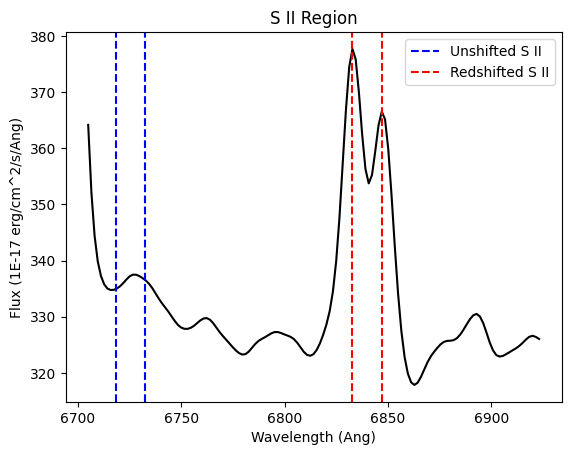

In [ ]:
# SII

max_values = scipy.signal.find_peaks(smoothed_flux[2460:2600], prominence=10)[0]
print(max_values)

shift_Sii = [wavelength[2460:2600][max_values[1]], wavelength[2460:2600][max_values[0]]]

print(f"S II unshifted bandgap: {S_II[0] - S_II[1]}, S II redshifted bandgap: {shift_Sii[0] - shift_Sii[1]}")

plt.plot(wavelength[2460:2600], smoothed_flux[2460:2600], color = 'black')

plt.axvline(S_II[0], linestyle= '--', label = 'Unshifted S II', color = 'blue')
plt.axvline(S_II[1], linestyle= '--', color = 'blue')

plt.axvline(shift_Sii[0], linestyle= '--', label = 'Redshifted S II', color = 'red')
plt.axvline(shift_Sii[1], linestyle= '--', color = 'red')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("S II Region")
plt.legend()

[ 42  91 102 115]
N II unshifted bandgap: 35.410000000000764, N II redshifted bandgap: 36.9111328125


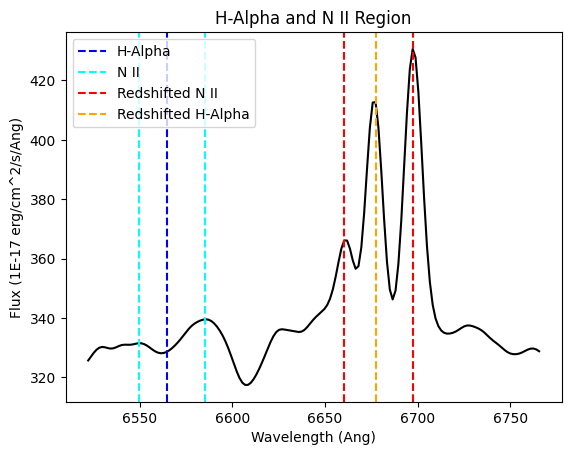

In [846]:
# H-Alpha and N II

max_values = scipy.signal.find_peaks(smoothed_flux[2340:2500], prominence=7)[0] # index = 1, 3 are Nii, 2 is Ha
print(max_values)

shift_Nii = [wavelength[2340:2500][max_values[3]], wavelength[2340:2500][max_values[1]]]

shift_H_alpha = wavelength[2340:2500][max_values[2]]

print(f"N II unshifted bandgap: {N_II[0] - N_II[1]}, N II redshifted bandgap: {shift_Nii[0] - shift_Nii[1]}")

plt.plot(wavelength[2340:2500], smoothed_flux[2340:2500], color = 'black')

plt.axvline(H_ALPHA, linestyle= '--', label = 'H-Alpha', color = 'blue')

plt.axvline(N_II[0], linestyle= '--', label = 'N II', color = 'cyan')
plt.axvline(N_II[1], linestyle= '--', color = 'cyan')

plt.axvline(shift_Nii[0], linestyle= '--', label = 'Redshifted N II', color = 'red')
plt.axvline(shift_Nii[1], linestyle= '--', color = 'red')

plt.axvline(shift_H_alpha, linestyle= '--', label = 'Redshifted H-Alpha', color = 'orange')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("H-Alpha and N II Region")
plt.legend()

# for value in max_values:
#     plt.axvline(wavelength[2340:2500][value], linestyle= '--', color = 'green')

#### Na, Mg, G-Band, H-Band and K-band Absorption

[  8  19  47  69  99 124 168 190]


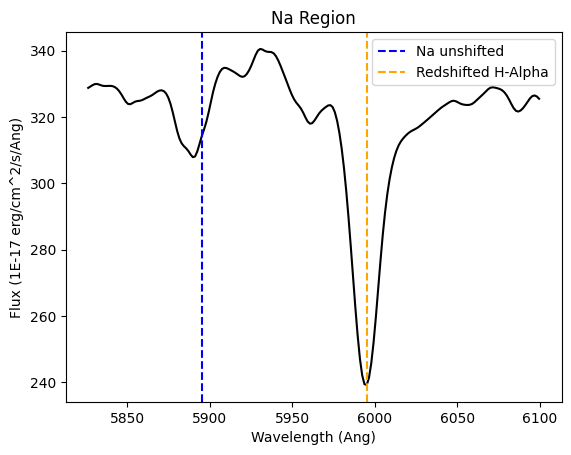

In [845]:
# Na

max_values = scipy.signal.argrelmin(smoothed_flux[1850:2050])[0] # index = 5
print(max_values)

shift_Na = wavelength[1850:2050][max_values[5]]

plt.plot(wavelength[1850:2050], smoothed_flux[1850:2050], color = 'black')

plt.axvline(NA, linestyle= '--', label = 'Na unshifted', color = 'blue')

plt.axvline(shift_Na, linestyle= '--', label = 'Redshifted H-Alpha', color = 'orange')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("Na Region")
plt.legend()

In [ ]:
# Mg

# max_values = scipy.signal.argrelmin(smoothed_flux[1850:2050])[0] # index = 5
# print(max_values)

# shift_Na = wavelength[1850:2050][max_values[5]]

plt.plot(wavelength[1850:2050], smoothed_flux[1850:2050], color = 'black')

plt.axvline(NA, linestyle= '--', label = 'Na unshifted', color = 'blue')

# plt.axvline(shift_Na, linestyle= '--', label = 'Redshifted H-Alpha', color = 'orange')

plt.xlabel("Wavelength (Ang)")
plt.ylabel("Flux (1E-17 erg/cm^2/s/Ang)")
plt.title("Na Region")
plt.legend()

#### Ca II Absorption

#### O III and H-Beta Emission Region

### 2. Evaluate the uncertainty in that measurement (in your measurement, not the data)

### 3. Determine how the uncertainty scales with the number of spectral lines used to measure the redshift

### 4. Determine if there are any significant systematic differences between measurements using different lines, or if there are any significant trends in the red shift measurement with wavelength
